# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных:**

Данные геологоразведки трёх регионов находятся в файлах: 
-	/datasets/geo_data_0.csv
-	/datasets/geo_data_1.csv
-	/datasets/geo_data_2.csv

В этих файлах:
-	id — уникальный идентификатор скважины;
-	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
-	product — объём запасов в скважине (тыс. баррелей).

**Нам также поставили следующие условия:**

-	Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
-	При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
-	Бюджет на разработку скважин в регионе — 10 млрд рублей.
-	При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
-	После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

**А также уточнили:** Данные синтетические - детали контрактов и характеристики месторождений не разглашаются.

**Наша цель:**

1.	Загрузить и подготовить данные. Пояснить порядок действий.
2.	Обучить и проверить модель для каждого региона:
   - Разбить данные на обучающую и валидационную выборки в соотношении 75:25.
   - Обучить модель и сделать предсказания на валидационной выборке.
   - Сохранить предсказания и правильные ответы на валидационной выборке.
   - Напечатать на экране средний запас предсказанного сырья и RMSE модели.
   - Проанализировать результаты.
3.	Подготовить данные к расчёту прибыли:
   - Все ключевые значения для расчётов сохранить в отдельных переменных.
   - Рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Сравнить полученный объём сырья со средним запасом в каждом регионе. 
   - Написать выводы по этапу подготовки расчёта прибыли.
4.	Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
   - Выберать скважины с максимальными значениями предсказаний. 
   - Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
   - Рассчитать прибыль для полученного объёма сырья.
5.	Посчитать риски и прибыль для каждого региона:
   - Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
   - Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
   - Написать выводы: предложить регион для разработки скважин и обосновать выбор.

**Наш план:**

1.	Загрузим и подготовим данные. Поясним порядок действий.
   - проверим полноту данных
   - проверим на дубликаты (явные и неявные). Удалим или исправим данные, если это необходимо.
   - заполним, где нужно пропуски
2.	Обучим и проверим модель для каждого региона:
   - Разобъём данные на обучающую и валидационную выборки в соотношении 75:25.
   - Обучим модель и сделаем предсказания на валидационной выборке.
   - Сохраним предсказания и правильные ответы на валидационной выборке.
   - Напечатаем на экране средний запас предсказанного сырья и RMSE модели.
   - Проанализируем результаты.
3.	Подготовим данные к расчёту прибыли:
   - Все ключевые значения для расчётов сохраним в отдельных переменных.
   - Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 
   - Напишем выводы по этапу подготовки расчёта прибыли.
4.	Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
   - Выберем скважины с максимальными значениями предсказаний. 
   - Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
   - Рассчитает прибыль для полученного объёма сырья.
5.	Посчитаем риски и прибыль для каждого региона:
   - Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
   - Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
6. Напишем выводы: предложим регион для разработки скважин и обоснуем выбор.


In [1]:
# ячейка для импорта библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

## Загрузка и подготовка данных

In [2]:
# сохраняем данные и смотрим на них
data_loc1 = pd.read_csv(r'https://code.s3.yandex.net/datasets/geo_data_0.csv')
data_loc2 = pd.read_csv(r'https://code.s3.yandex.net/datasets/geo_data_1.csv')
data_loc3 = pd.read_csv(r'https://code.s3.yandex.net/datasets/geo_data_2.csv')

display(data_loc1.head())
display(data_loc2.head())
display(data_loc3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Данные открылись успешно. Будем проверять их на пропуски и дубликаты. Дубликаты имеет смысл проверять только явные - ибо неявных здесь нет точно.

In [3]:
# проверка данных на пропуски
print(data_loc1.info())
print(data_loc2.info())
print(data_loc3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

Даннные полные - и притом везде. Проверим дубликаты и будем обучать модели.

In [4]:
# проверка на явные дубликаты 
print(data_loc1.duplicated().sum())
print(data_loc2.duplicated().sum())
print(data_loc3.duplicated().sum())

0
0
0


Дубликатов нет - двигаемся дальше.

In [5]:
# проверим дубликаты по столбцу id во всех файлах
print(data_loc1.id.duplicated().sum())
print(data_loc2.id.duplicated().sum())
print(data_loc3.id.duplicated().sum())

10
4
4


Во всех столбцах id нашлись дубликаты, хотя и немного. Их необходимо удалять. Сделаем это.

In [6]:
# удаляем дубликаты в столбцах id во всех файлах
data_loc1 = data_loc1.loc[data_loc1.id.duplicated() == False]
data_loc2 = data_loc2.loc[data_loc2.id.duplicated() == False]
data_loc3 = data_loc3.loc[data_loc3.id.duplicated() == False]

# проверяем успешность удаления и размер оставшихся данных
print(data_loc1.id.duplicated().sum())
print(data_loc2.id.duplicated().sum())
print(data_loc3.id.duplicated().sum())
print(data_loc1.shape)
print(data_loc2.shape)
print(data_loc3.shape)

0
0
0
(99990, 5)
(99996, 5)
(99996, 5)


Удаление прошло успешно. данных много не потеряли. Посмотрим сколько нефти у нас есть в целом по скважинам нефти в каждом регионе.

count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
5%          24.021339
25%         56.497069
50%         91.847928
75%        128.563699
80%        135.087660
95%        161.206623
max        185.364347
Name: product, dtype: float64

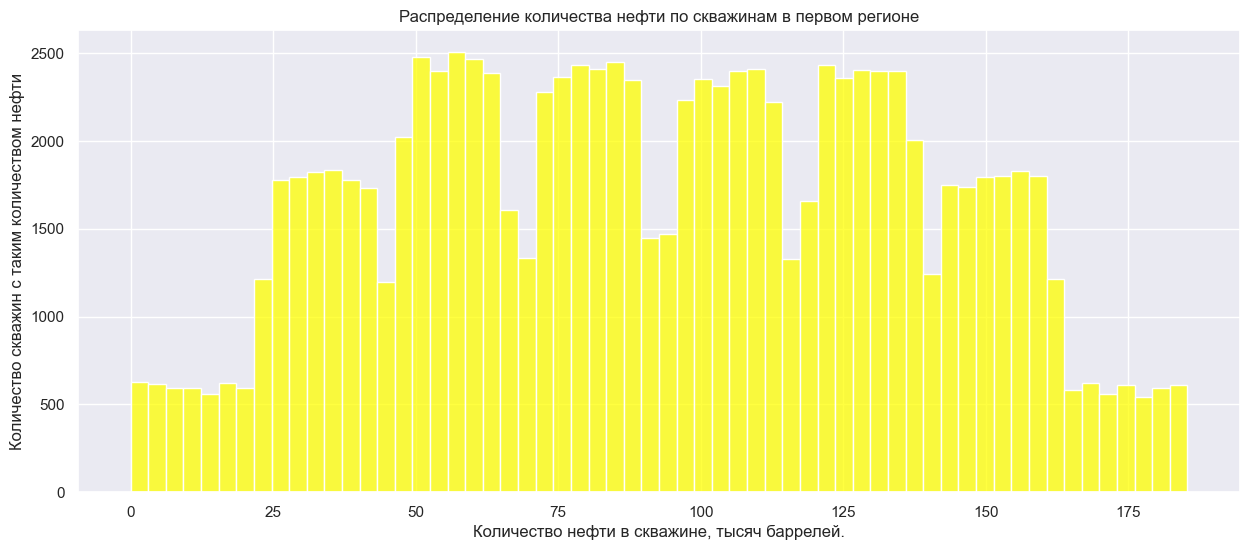

In [7]:
# смотрим на распределение нефти по свкажинам в первом регионе
sns.set(rc={'figure.figsize': (15, 6)})
ax = sns.histplot(data=data_loc1['product'], color='yellow')
ax.set(xlabel='Количество нефти в скважине, тысяч баррелей.', ylabel='Количество скважин с таким количеством нефти', \
       title='Распределение количества нефти по скважинам в первом регионе')
data_loc1['product'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.95])

Распределение количества нормальное. Больше всего скважин имеют диапазон от 50 до 137 тысяч баррелей нефти. В среднем по региону в каждой скважине находиться около 92.5 тысяч баррелей. 5% самых плохих скаважин имеют до 24 тысяч баррелей нефти, а 5% самых крупных от 161 до 185 тысяч баррелей. Среднее и медиана отличаются не очень сильно.

Но много это или мало можно понять лишь в сравнении с другиги регионами. Поэтому надо изучать и их.

count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
5%           0.000000
25%         26.953261
50%         57.085625
75%        107.813044
80%        110.992147
95%        137.945408
max        137.945408
Name: product, dtype: float64

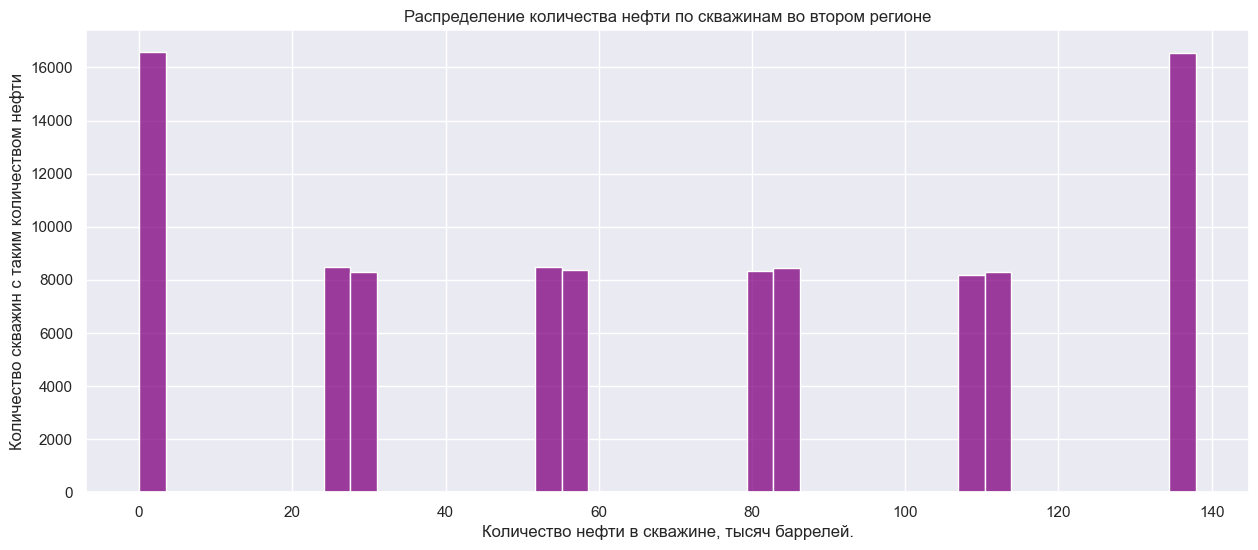

In [8]:
# смотрим на распределение нефти по свкажинам во втором регионе
ax = sns.histplot(data=data_loc2['product'], color='purple')
ax.set(xlabel='Количество нефти в скважине, тысяч баррелей.', ylabel='Количество скважин с таким количеством нефти', \
       title='Распределение количества нефти по скважинам во втором регионе')
data_loc2['product'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.95])

Ещё немного и будет нарисован полумесяц! Распределение не является нормальным. Или довольно густо или очень пусто. Но даже так максимальное количество нефти в скважине немногим меньше 138 тысяч баррелей нефти. Среднее - 68.8 тысяч баррелей, а вот медиана - 57.1 тысяч баррелей. Большая разница! Более 5% скважин вообще пустые! А по графику их более 16%! Очень много. На вскидку можно сказать, что разработка в этом регионе сопряжена с приличным риском.

Первый регион и большие скважины имеет и нет таких диких провалов. А что с третьим регионом? Сейчас узнаем.

count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
5%          24.676853
25%         59.450028
50%         94.925026
75%        130.586815
80%        136.967365
95%        165.661507
max        190.029838
Name: product, dtype: float64

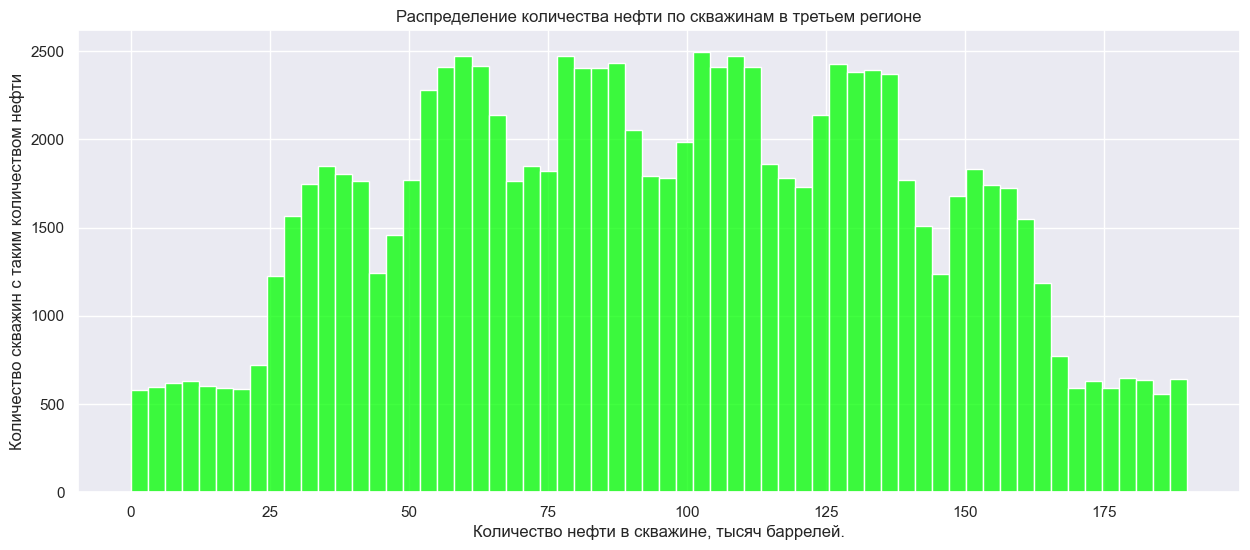

In [9]:
# смотрим на распределение нефти по свкажинам в третьем регионе
ax = sns.histplot(data=data_loc3['product'], color='lime')
ax.set(xlabel='Количество нефти в скважине, тысяч баррелей.', ylabel='Количество скважин с таким количеством нефти', \
       title='Распределение количества нефти по скважинам в третьем регионе')
data_loc3['product'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.95])

Распределение совпадает с первым регионом. Но здесь немного выше среднее - почти 95 тысяч баррелей в каждой скважине. Среднее и медиана почти совпадают. Также выше максимальное количество нефти в скважине - 190 тысяч баррелей. Снова 5% самых маленьких до 24.6 тысяч баррелей, а 5% самых крупных - от 165.6 до 190 тысяч баррелей.

Самый лучший по распределению - третий регион. Для наглядности наложим эти графики друг на друга.

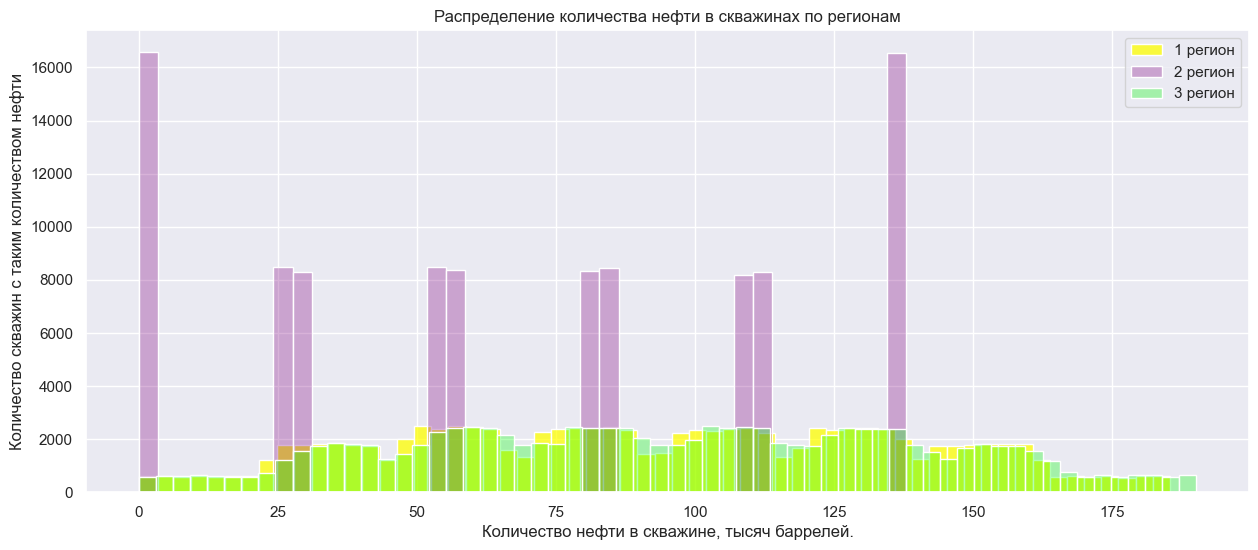

In [10]:
# смотрим на распределение нефти по свкажинам по регионам
ax = sns.histplot(data=data_loc1['product'], color='yellow')
ax.set(xlabel='Количество нефти в скважине, тысяч баррелей.', ylabel='Количество скважин с таким количеством нефти', \
       title='Распределение количества нефти в скважинах по регионам')
sns.histplot(data=data_loc2['product'], color='purple', ax=ax, alpha=0.3)
sns.histplot(data=data_loc3['product'], color='lime', ax=ax, alpha=0.3)
ax.legend(['1 регион', '2 регион','3 регион']);

Наглядно - самые большие объёмы скважин у третьего региона, а второй регион самый нестабильный среди всех и с наименьшими максимальными объёмами.

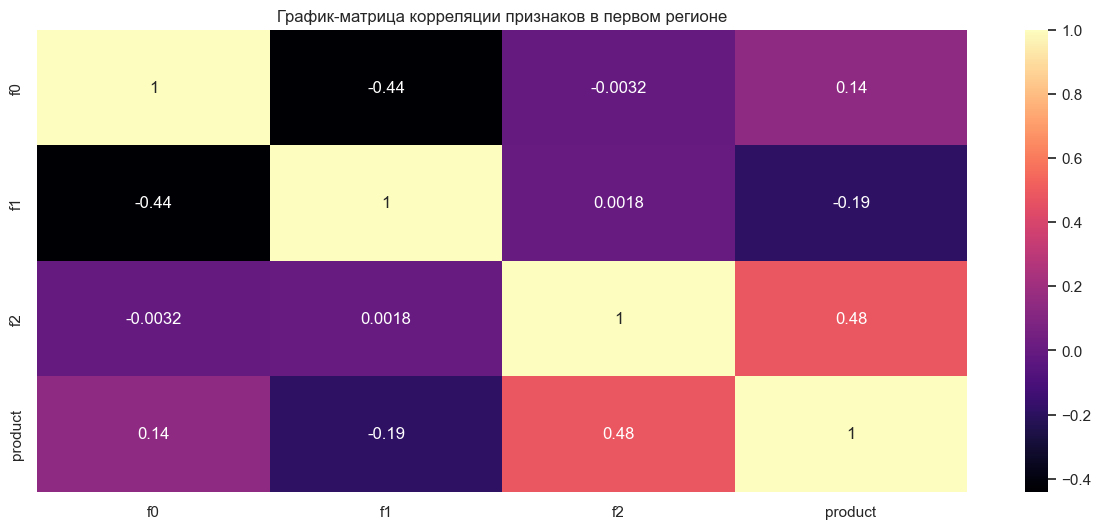

In [11]:
# проверяем влияние переменных друг на друга и на целевую переменную по первому региону
ax = sns.heatmap(data=data_loc1.drop('id', axis=1).corr(), annot=True, cmap='magma')
ax.set(title='График-матрица корреляции признаков в первом регионе');

Линейных зависимостей здесь нет. Сильнее всего на целевую переменную влияет признак f2 - но и он далёк от линейных зависимостей - всего 0.48. А между собой немного взаимосвязаны признаки f0 и f1 - но и то не очень сильно - 0.44. Отсюда вывод - лишних признаков здесь нет.

Проверим тоже самое на данных про второй и третий регион.

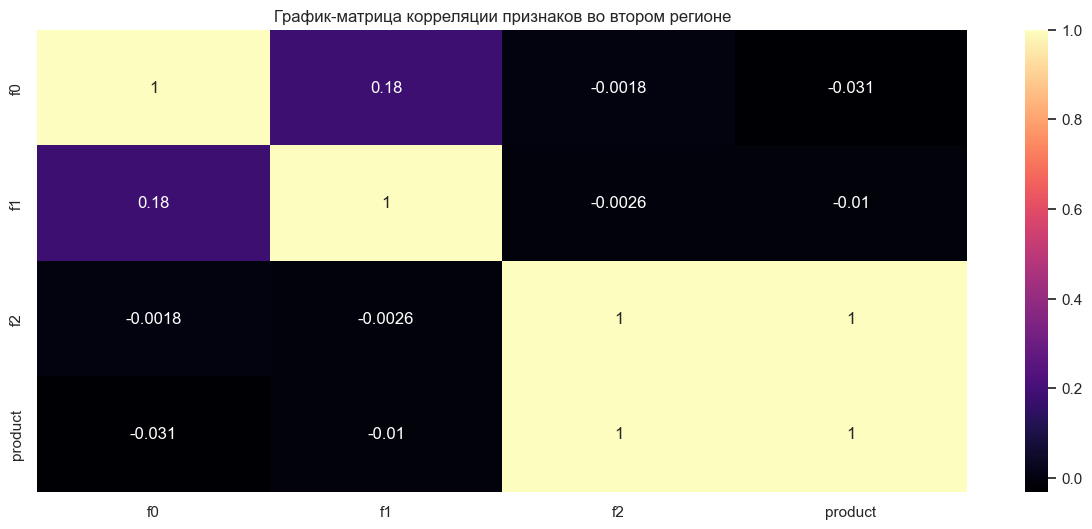

In [12]:
# проверяем влияние переменных друг на друга и на целевую переменную по второму региону
ax = sns.heatmap(data=data_loc2.drop('id', axis=1).corr(), annot=True, cmap='magma')
ax.set(title='График-матрица корреляции признаков во втором регионе');

Во втором регионе единственный фактор, который влияет на целевую переменную - это признак f2, но на него не влияет ничего. Создаётся ощущение, что признаки f0 и f1 здесь даже особо и не важны. А что с третьим регионом?

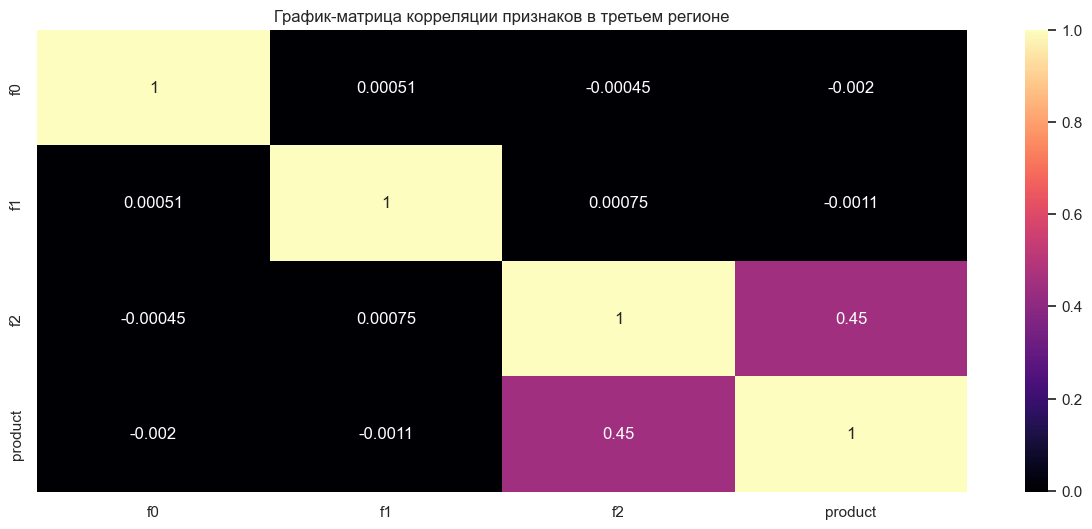

In [13]:
# проверяем влияние переменных друг на друга и на целевую переменную по третьему региону
ax = sns.heatmap(data=data_loc3.drop('id', axis=1).corr(), annot=True, cmap='magma')
ax.set(title='График-матрица корреляции признаков в третьем регионе');

Самый важный признак снова f2, но его влияние на целевую переменную не очень велико - 0.45. Немного меньше, чем в первом регионе. Но остальные переменные можно сказать никакой взаимосвязи между собой не имеют.

## Обучение и проверка модели

In [14]:
# создадим фунцию для разделения на признаки и целевую переменную
def sep_features_target(DataFrame, features_drop: list, target: str):
    DataFrame_features = DataFrame.drop(features_drop, axis=1)
    DataFrame_target = DataFrame[target]
    return DataFrame_features, DataFrame_target

# делим признаки и целевую пременную во всех регионах
data_loc1_features, data_loc1_target = sep_features_target(data_loc1, ['product', 'id'], 'product')
data_loc2_features, data_loc2_target = sep_features_target(data_loc2, ['product', 'id'], 'product')
data_loc3_features, data_loc3_target = sep_features_target(data_loc3, ['product', 'id'], 'product')

# проверим разбитие - возьмём размер датафреймов
print(data_loc1_features.shape, data_loc1_target.shape)
print(data_loc2_features.shape, data_loc2_target.shape)
print(data_loc3_features.shape, data_loc3_target.shape)

(99990, 3) (99990,)
(99996, 3) (99996,)
(99996, 3) (99996,)


Разделение прошло успешно. Теперь пришла пора обучать модель.

In [15]:
# разделим данные на тестовую и валидационную выборки во всех регионах
data_loc1_features_train, data_loc1_features_valid, data_loc1_target_train, data_loc1_target_valid = \
train_test_split(data_loc1_features, data_loc1_target, test_size=0.25, random_state=123)
data_loc2_features_train, data_loc2_features_valid, data_loc2_target_train, data_loc2_target_valid = \
train_test_split(data_loc2_features, data_loc2_target, test_size=0.25, random_state=123)
data_loc3_features_train, data_loc3_features_valid, data_loc3_target_train, data_loc3_target_valid = \
train_test_split(data_loc3_features, data_loc3_target, test_size=0.25, random_state=123)

# правим индексы для дальнейшей работы
data_loc1_target_valid = data_loc1_target_valid.reset_index(drop=True)
data_loc2_target_valid = data_loc2_target_valid.reset_index(drop=True)
data_loc3_target_valid = data_loc3_target_valid.reset_index(drop=True)

# проверим, что получилось
print(data_loc1_features_train.shape, data_loc1_features_valid.shape)
print(data_loc1_target_train.shape, data_loc1_target_valid.shape)
print(data_loc2_features_train.shape, data_loc2_features_valid.shape)
print(data_loc2_target_train.shape, data_loc2_target_valid.shape)
print(data_loc3_features_train.shape, data_loc3_features_valid.shape)
print(data_loc3_target_train.shape, data_loc3_target_valid.shape)

(74992, 3) (24998, 3)
(74992,) (24998,)
(74997, 3) (24999, 3)
(74997,) (24999,)
(74997, 3) (24999, 3)
(74997,) (24999,)


Разбитие прошло успешно. Теперь обучаем модель линейной регрессии.

In [16]:
# функция для создания молели линейной регрессии и предсказания результатов с неё
def lin_reg_fit_predict(train_features, train_target, valid_features):
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(train_features, train_target)
    valid_pred = lin_reg_model.predict(valid_features)
    return lin_reg_model, valid_pred

# обучаем модели линейной регрессии для регионов
lin_reg_model_loc1, y_pred_loc1 = lin_reg_fit_predict(data_loc1_features_train, data_loc1_target_train,data_loc1_features_valid)
lin_reg_model_loc2, y_pred_loc2 = lin_reg_fit_predict(data_loc2_features_train, data_loc2_target_train,data_loc2_features_valid)
lin_reg_model_loc3, y_pred_loc3 = lin_reg_fit_predict(data_loc3_features_train, data_loc3_target_train,data_loc3_features_valid)

# средние запасы сырья по предсказаниям моделей по регионам
print('В первом регионе запасы сырья в каждой скважине примерно равны:', pd.Series(y_pred_loc1).mean())
print('Во втором регионе запасы сырья в каждой скважине примерно равны:', pd.Series(y_pred_loc2).mean())
print('В третьем регионе запасы сырья в каждой скважине примерно равны:', pd.Series(y_pred_loc3).mean())

# ошибки моделей по метрике RMSE по каждому из регионов
print('Ошибка модели по первому региону:', sm.mean_squared_error(data_loc1_target_valid, y_pred_loc1, squared=False))
print('Ошибка модели по второму региону:', sm.mean_squared_error(data_loc2_target_valid, y_pred_loc2, squared=False))
print('Ошибка модели по третьему региону:', sm.mean_squared_error(data_loc3_target_valid, y_pred_loc3, squared=False))

В первом регионе запасы сырья в каждой скважине примерно равны: 92.68062036375521
Во втором регионе запасы сырья в каждой скважине примерно равны: 69.31422919477679
В третьем регионе запасы сырья в каждой скважине примерно равны: 94.93789877099006
Ошибка модели по первому региону: 37.59580657262362
Ошибка модели по второму региону: 0.8944711936820178
Ошибка модели по третьему региону: 40.04908749269797


В первом и в третьем регионе в каждой скважине в целом находиться (по предсказаниям моделей) больше запасов нефти, но при этом во второй модели намного ниже ошибка модели, чем в превом и в третьем случаях.

In [17]:
%%time

# действительно ли надёжность иных моделей не выше, чем у простой линейной регрессии?
# делить выборки не будем, а используем кросс валидацию для дерева решений
model_tree = DecisionTreeRegressor(random_state=123)
gsearch_tree = GridSearchCV(estimator=model_tree, cv=4, param_grid={'max_depth': [i for i in range(1, 15)], \
                                                                  'min_samples_split': [i for i in range(2, 20)], \
                                                                  'min_impurity_decrease': np.arange(0, 0.05, 0.01)}, \
                          scoring='neg_root_mean_squared_error')
gsearch_tree.fit(data_loc1_features, data_loc1_target)
best_model_tree = gsearch_tree.best_estimator_
best_score_tree = gsearch_tree.best_score_
best_params_tree = gsearch_tree.best_params_
print(-best_score_tree, best_params_tree, sep='\n')

37.54176202720258
{'max_depth': 8, 'min_impurity_decrease': 0.04, 'min_samples_split': 18}
CPU times: total: 51min 7s
Wall time: 51min 16s


И, действительно, несмотря на достаточно долгое обучение и использованную кросс-валидацию дерево решений показало почти такой же результат, как и линейная регрессия на первом регионе. В дальнейшем использовании нет большого смысла.

## Подготовка к расчёту прибыли

In [18]:
# создаём графу максимальная прибыль во всех основных датафреймах (для каждой скважины)
profit_with_barrel = 450000 # прибыль с тысячи баррелей, рублей
data_loc1['max_profit'] = data_loc1['product'] * profit_with_barrel
data_loc2['max_profit'] = data_loc2['product'] * profit_with_barrel
data_loc3['max_profit'] = data_loc3['product'] * profit_with_barrel

# создаём графу масимальная возможная прибыль
investment = 10000000000 # инвестиции на разработку скважин в регионе, рублей
data_loc1['max_final_profit'] = data_loc1['max_profit'] - investment
data_loc2['max_final_profit'] = data_loc2['max_profit'] - investment
data_loc3['max_final_profit'] = data_loc3['max_profit'] - investment

#  создаём графу возврат на инвестиции с каждой скважины (ROI)
data_loc1['roi'] = data_loc1['max_final_profit'] / investment
data_loc2['roi'] = data_loc2['max_final_profit'] / investment
data_loc3['roi'] = data_loc3['max_final_profit'] / investment

# проверим, что вышло
display(data_loc1.head(10))
display(data_loc2.head(10))
display(data_loc3.head(10))

,id,f0,f1,f2,product,max_profit,max_final_profit,roi
0,txEyH,0.705745,-0.497823,1.221170,105.280062,4.737603e+07,-9.952624e+09,-0.995262
1,2acmU,1.334711,-0.340164,4.365080,73.037750,3.286699e+07,-9.967133e+09,-0.996713
2,409Wp,1.022732,0.151990,1.419926,85.265647,3.836954e+07,-9.961630e+09,-0.996163
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,7.587935e+07,-9.924121e+09,-0.992412
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,6.931649e+07,-9.930684e+09,-0.993068
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541,2.913369e+07,-9.970866e+09,-0.997087
6,tL6pL,0.645075,0.530656,1.780266,49.055285,2.207488e+07,-9.977925e+09,-0.997793
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292,3.282448e+07,-9.967176e+09,-0.996718
8,j9Oui,0.643105,-0.551583,2.372141,113.356160,5.101027e+07,-9.948990e+09,-0.994899
9,OLuZU,2.173381,0.563698,9.441852,127.910945,5.755993e+07,-9.942440e+09,-0.994244


,id,f0,f1,f2,product,max_profit,max_final_profit,roi
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,1.430596e+06,-9.998569e+09,-0.999857
1,62mP7,14.272088,-3.475083,0.999183,26.953261,1.212897e+07,-9.987871e+09,-0.998787
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,6.064484e+07,-9.939355e+09,-0.993936
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,6.207543e+07,-9.937925e+09,-0.993792
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,6.064484e+07,-9.939355e+09,-0.993936
5,HHckp,-3.327590,-2.205276,3.003647,84.038886,3.781750e+07,-9.962183e+09,-0.996218
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147,4.994647e+07,-9.950054e+09,-0.995005
7,muH9x,4.234715,-0.001354,2.004588,53.906522,2.425793e+07,-9.975742e+09,-0.997574
8,YiRkx,13.355129,-0.332068,4.998647,134.766305,6.064484e+07,-9.939355e+09,-0.993936
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408,6.207543e+07,-9.937925e+09,-0.993792


,id,f0,f1,f2,product,max_profit,max_final_profit,roi
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,1.249140e+07,-9.987509e+09,-0.998751
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,2.523136e+07,-9.974769e+09,-0.997477
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,2.829236e+07,-9.971708e+09,-0.997171
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,5.155778e+07,-9.948442e+09,-0.994844
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,6.732034e+07,-9.932680e+09,-0.993268
5,LzZXx,-0.758092,0.710691,2.585887,90.222465,4.060011e+07,-9.959400e+09,-0.995940
6,WBHRv,-0.574891,0.317727,1.773745,45.641478,2.053867e+07,-9.979461e+09,-0.997946
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640,3.261629e+07,-9.967384e+09,-0.996738
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832,4.797757e+07,-9.952022e+09,-0.995202
9,OilcN,-1.214452,-0.439314,5.922514,52.954532,2.382954e+07,-9.976170e+09,-0.997617


Ни одна скважина не сможет обеспечить задачу покрытия общих расходов по сравнению с вложениями - тут просто другой порядок. Значит, единственный способ заработать на вложениях - копать сразу во многих местах. И в условиях нам говорят: копать будем в 200 лучших местах из 500 отобранных. Это и будем проверять.

In [19]:
# сколько тысяч баррелей нефти должны быть в среднем в каждой скважине для точки безубыточности при 200 скважинах?
n_wells = 200
print('Для безубыточности надо иметь в каждой скважине по', round(investment / (profit_with_barrel * n_wells), 2), 'тысяч баррелей нефти.')

Для безубыточности надо иметь в каждой скважине по 111.11 тысяч баррелей нефти.


Вот здесь и возникает проблема - это больше, чем в среднем имеют скважины в любом из регионов - а, значит, выбирать каждую скважину нужно тщательнее. Важно понимать, что средние показатели расчитаны на основе 25000 точек для разработки скважин и мы можем выбрать среди них только 200. Навярняка среди этих 200 скважин будут как и очень хорошие, так и плохие. Фактически отбирая их много раз случайным образом мы можем понять какие у нас есть вероятности получить нужный нам результат и понять какие у нас есть риски получения убытков. Это и есть причина по которой надо продолжать исследование.

## Расчёт прибыли и рисков 

In [20]:
# создадим функцию для расчёта прибыли со скважин
def net_profit(DataFrame_target, list_pred, profit_with_barrel, n_wells, investment):
    series_pred = pd.Series(list_pred).sort_values(ascending=False).head(n_wells)
    volume_barrels = DataFrame_target.iloc[series_pred.index].sum()
    profit = (volume_barrels * profit_with_barrel - investment) / 1000000 # для большей читабельности сумма прибыли - в млн. руб.
    return profit, volume_barrels

In [21]:
# рассчитаем максимальную прибыль в каждом из регионов при условии идеального выбора 200 скважин
max_profit_loc1, volume_barrels_loc1 = net_profit(data_loc1_target_valid, y_pred_loc1, profit_with_barrel, n_wells, investment)
max_profit_loc2, volume_barrels_loc2 = net_profit(data_loc2_target_valid, y_pred_loc2, profit_with_barrel, n_wells, investment)
max_profit_loc3, volume_barrels_loc3 = net_profit(data_loc3_target_valid, y_pred_loc3, profit_with_barrel, n_wells, investment)

# смотрим на результат
print('Максимальная прибыль в первом регионе равна:', max_profit_loc1, 'млн. рублей.')
print('Максимальная прибыль во втором регионе равна:', max_profit_loc2, 'млн. рублей.')
print('Максимальная прибыль в третьем регионе равна:', max_profit_loc3, 'млн. рублей.')
print('Объём найденной нефти в первом регионе', volume_barrels_loc1, 'тысяч баррелей.')
print('Объём найденной нефти во втором регионе', volume_barrels_loc2, 'тысяч баррелей.')
print('Объём найденной нефти в третьем регионе', volume_barrels_loc3, 'тысяч баррелей.')

Максимальная прибыль в первом регионе равна: 3254.756682630411 млн. рублей.
Максимальная прибыль во втором регионе равна: 2415.086696681511 млн. рублей.
Максимальная прибыль в третьем регионе равна: 2237.5523154973716 млн. рублей.
Объём найденной нефти в первом регионе 29455.014850289805 тысяч баррелей.
Объём найденной нефти во втором регионе 27589.081548181137 тысяч баррелей.
Объём найденной нефти в третьем регионе 27194.56070110527 тысяч баррелей.


И всё же при идеальном выборе мест для будения скважин это довольно выгодно. Особенно для первого региона. Прибыль соотвественно будет составлять 32.54%. для второго и третьего региона это не настолько выгодно - но тоже прибыль в 24.15% и в 22.37% весьма неплоха. Но что будет при реальном выборе? Какая вероятность вообще получить прибыль (не забываем, что точка безубыточности больше среднего по каждому из регионов)? Проверим это по технологии бустреп.

In [22]:
# будем выбирать 1000 раз случайным образом по 500 скважин и из них будем брать 200 лучших и считать прибыль исходя из этого
state = np.random.RandomState(123)

# создаём функцию процедуры бутстрапирования
def boostrap(DataFrame_target, list_pred, profit_with_barrel, n_wells, investment, n_iter, n_sample, random_state):
    possible_profits =  []
    possible_volume_barrels = []
    for i in range(n_iter):
        sample_data = pd.Series(list_pred).sample(n=n_sample, random_state=random_state)
        data_target = DataFrame_target.iloc[sample_data.index]
        sample_data = sample_data.reset_index(drop=True)
        profits, volume = net_profit(data_target, sample_data, profit_with_barrel, n_wells, investment)
        possible_profits.append(profits)
        possible_volume_barrels.append(volume)
    return possible_profits, possible_volume_barrels

# применяем бутстрапирование ко всем регионам
possible_profits_loc1, possible_volume_barrels_loc1 = boostrap(data_loc1_target_valid, y_pred_loc1, profit_with_barrel, \
                                                               n_wells, investment, 1000, 500, state)
possible_profits_loc2, possible_volume_barrels_loc2 = boostrap(data_loc2_target_valid, y_pred_loc2, profit_with_barrel, \
                                                               n_wells, investment, 1000, 500, state)
possible_profits_loc3, possible_volume_barrels_loc3 = boostrap(data_loc3_target_valid, y_pred_loc3, profit_with_barrel, \
                                                               n_wells, investment, 1000, 500, state)
    
# считаем среднюю прибыль и средний объём найденной нефти по случайным выборкам по регионам
print('Средняя возможная чистая прибыль по первому региону составляет:', round(pd.Series(possible_profits_loc1).mean()), "млн. рублей.")
print('Средняя возможная чистая прибыль по второму региону составляет:', round(pd.Series(possible_profits_loc2).mean()), "млн. рублей.")
print('Средняя возможная чистая прибыль по третьему региону составляет:', round(pd.Series(possible_profits_loc3).mean()), "млн. рублей.")
print('Средний найденный объём нефти в первом регионе равен',pd.Series(possible_volume_barrels_loc1).mean() , 'тысяч баррелей.')
print('Средний найденный объём нефти во втором регионе равен',pd.Series(possible_volume_barrels_loc2).mean() , 'тысяч баррелей.')
print('Средний найденный объём нефти в третьем регионе равен',pd.Series(possible_volume_barrels_loc3).mean() , 'тысяч баррелей.')

Средняя возможная чистая прибыль по первому региону составляет: 399 млн. рублей.
Средняя возможная чистая прибыль по второму региону составляет: 480 млн. рублей.
Средняя возможная чистая прибыль по третьему региону составляет: 346 млн. рублей.
Средний найденный объём нефти в первом регионе равен 23108.1726688608 тысяч баррелей.
Средний найденный объём нефти во втором регионе равен 23287.81118006416 тысяч баррелей.
Средний найденный объём нефти в третьем регионе равен 22991.841208441077 тысяч баррелей.


Как ни странно, но во втором регионе средняя прибыль больше, чем в 1ом или в 3ьем, а что с точкой безубыточности? Вложимся ли мы в 2.5% убытков при случайной выборке? Проверим для всех регионов. Коэффициент ROI для второго региона равен 4.8%. Для первого региона - 3.99%, а для третьего региона - 3.46%.

In [23]:
# получим ли мы убытки с вероятностью 2.5%?
print('С вероятностью в 2.5% мы заработаем в первом регионе', round(pd.Series(possible_profits_loc1).sort_values().quantile(q=0.025)), 'млн. рублей')
print('С вероятностью в 2.5% мы заработаем во втором регионе', round(pd.Series(possible_profits_loc2).sort_values().quantile(q=0.025)), 'млн. рублей')
print('С вероятностью в 2.5% мы заработаем в третьем регионе', round(pd.Series(possible_profits_loc3).sort_values().quantile(q=0.025)), 'млн. рублей')

С вероятностью в 2.5% мы заработаем в первом регионе -118 млн. рублей
С вероятностью в 2.5% мы заработаем во втором регионе 86 млн. рублей
С вероятностью в 2.5% мы заработаем в третьем регионе -176 млн. рублей


Во втором регионе с вероятностью в 97.5% мы получим прибыль, пускай и не очень большую. В первом или третьем регионе мы можем получить убытки как минимум в 2.5%. Последний вопрос - а какова вообще вероятность убытков по регионам? Рассчитаем.

In [24]:
# рассчитываем вероятность убытков по регионам
print('Вероятность убытков в первом регионе равна',\
      round(pd.Series(possible_profits_loc1).loc[lambda x: x < 0].size / pd.Series(possible_profits_loc1).size * 100, 2), '%.')
print('Вероятность убытков во втором регионе равна',\
      round(pd.Series(possible_profits_loc2).loc[lambda x: x < 0].size / pd.Series(possible_profits_loc2).size * 100, 2), '%.')
print('Вероятность убытков в третьем регионе равна',\
      round(pd.Series(possible_profits_loc3).loc[lambda x: x < 0].size / pd.Series(possible_profits_loc3).size * 100, 2), '%.')

Вероятность убытков в первом регионе равна 6.3 %.
Вероятность убытков во втором регионе равна 0.4 %.
Вероятность убытков в третьем регионе равна 9.4 %.


Потенциально убыточным может быть любой регион, но вероятность убытков во втором регионе значительно ниже, чем в первом или в третьем. В третьем регионе вероятность убытков достаточно высока. И момент: найдём 95% доверительный интервал для всех регионов.

In [25]:
# ищем 95% доверительный интервал по распределению прибыли для всех регионов
# это (среднее -1.96 * сигма ;  среднее +1.96 * сигма)
# для этого напишем функцию
def confidence_interval_95(selections):
    mean_value = pd.Series(selections).mean()
    std_value = pd.Series(selections).std()
    return mean_value - 1.96 * std_value, mean_value + 1.96 * std_value
    
print('95% доверительный интервал для прибыли в первом регионе равен:', confidence_interval_95(possible_profits_loc1))
print('95% доверительный интервал для прибыли во втором регионе равен:', confidence_interval_95(possible_profits_loc2))
print('95% доверительный интервал для прибыли в третьем регионе равен:', confidence_interval_95(possible_profits_loc3))

95% доверительный интервал для прибыли в первом регионе равен: (-121.65538279864995, 919.0107847733727)
95% доверительный интервал для прибыли во втором регионе равен: (99.30120376469529, 859.7288582930504)
95% доверительный интервал для прибыли в третьем регионе равен: (-181.6483759859176, 874.3054635828895)


Надо сказать, что несмотря на то, что во втором регионе не удаётся получить больших прибылей, зато мы не рискуем получить убытки, что не маловажно,особенно если учесть что верхний предел отличается не так сильно как нижний. Теперь у нас есть все данные для принятия решения. 

## Общий вывод

Исходя из нашего анализа однозначно надо предпочесть второй регион. В среднем при вложении в 10 млрд рублем мы сможем заработать 480 млн. рублей. Или же рассчитав коэффициент - возврат на инвестиции (ROI) в размере 4.8%. Даже в относительно неудачном случае мы не получим убытков как минимум в 97.5%, а заработаем 86 млн. рублей, что лишь понижает наш возрат на инвестции до 0.86%. В лучшем случае мы заработаем немногим более 2.4 млрд рублей, но на такую удачу рассчитывать нельзя. В 95% случаев наша прибыль будет не больше 859 млн. рублей. Только с вероятностью в 0.4% мы получим убыток. Это выглядит достаточно выгодным вложением денег, во всяком случае по сравнению с другими регионами, ввиду намного большей вероятности убытков в них и меньшего среднего значения потенциальной прибыли.